# Plot zostoga from CMIP5 and CMIP6

In [1]:
import sys

import xarray as xr
import matplotlib.pyplot as plt

sys.path.append('../code/')
import mod_loc as loc

In [2]:
data_dir = '../outputs/'

In [3]:
cmip6 = xr.open_dataset(data_dir+'CMIP6_SeaLevel_ssp585_zostoga_1986_2100.nc')
cmip6

<xarray.Dataset>
Dimensions:            (model: 14, time: 114)
Coordinates:
  * model              (model) object 'MIROC6' 'MPI-ESM1-2-HR' ... 'MRI-ESM2-0'
  * time               (time) float64 1.986e+03 1.988e+03 ... 2.098e+03 2.1e+03
Data variables:
    zostoga_corrected  (model, time) float64 ...
    trend_piControl    (model, time) float64 ...
Attributes:
    source_file:    This NetCDF file was built from ComputeGlobalThermalExpan...
    creation_date:  2020-08-22 16:29

In [4]:
cmip6.zostoga_corrected.sel(time=2099.5)

<xarray.DataArray 'zostoga_corrected' (model: 14)>
array([0.303608, 0.2805  , 0.294326, 0.346191, 0.293673, 0.327527, 0.309108,
       0.28677 , 0.377158, 0.432079, 0.207188, 0.282627, 0.321044, 0.370838])
Coordinates:
  * model    (model) object 'MIROC6' 'MPI-ESM1-2-HR' ... 'MRI-ESM2-0'
    time     float64 2.1e+03

In [5]:
loc.print_results_da(cmip6.zostoga_corrected)

Mean and 5-95 percentile range: 
Year 2099
0.3166168706613754 [ 0.23171150795777806 - 0.4015222333649727 ]
Year 2081-2099
0.26982969487561004 [ 0.19887803325977574 - 0.3407813564914443 ]


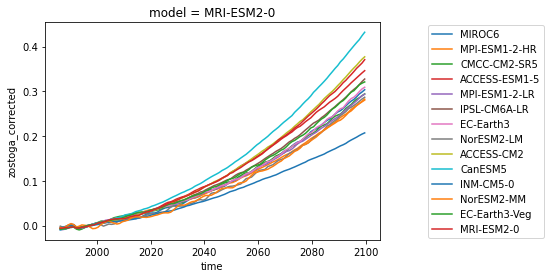

In [6]:
fig, axes = plt.subplots(ncols=1)
for mod in cmip6.model:
    cmip6.zostoga_corrected.sel(model=mod).plot(ax=axes, label=mod.values)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

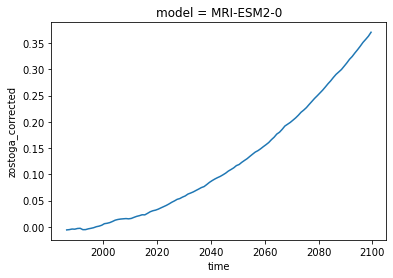

In [7]:
cmip6.zostoga_corrected.sel(model='MRI-ESM2-0').plot()